## Training Pipeline using PyTorch 
Making a neural network 

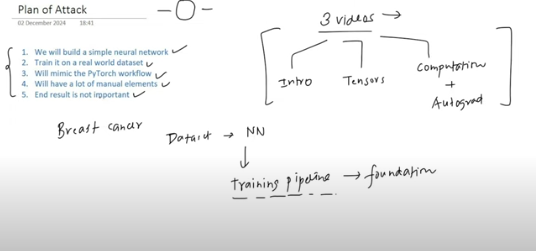

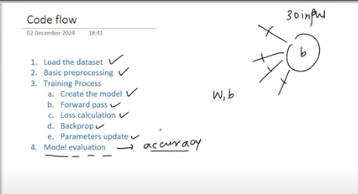

#### Imports

In [65]:
# import
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


#### Load Breast cancer dataset from github

In [66]:
# Creating pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [67]:
df.shape

(569, 33)

In [68]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [69]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Train Test Split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

#### Scaling

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
X_train

array([[-0.53505381, -1.6133936 , -0.56199239, ..., -0.34109441,
        -0.13616183, -0.8998071 ],
       [ 1.22842185, -0.52271766,  1.15310383, ...,  0.75087569,
        -0.03173947,  0.01039879],
       [-0.42935653, -1.66412272, -0.48016759, ..., -0.51449611,
        -0.21720605,  0.55490178],
       ...,
       [ 0.00734012,  0.72936911,  0.03939975, ...,  0.28728245,
        -0.33721384, -0.04632027],
       [ 0.40787718, -1.25828981,  0.37113282, ...,  0.30511296,
        -0.29825027, -0.73775264],
       [-1.25212641, -0.85706863, -1.26133245, ..., -0.96991703,
        -0.11434223, -0.14139222]], shape=(455, 30))

In [73]:
y_train

170    B
121    M
418    B
172    M
477    B
      ..
376    B
45     M
536    M
133    B
273    B
Name: diagnosis, Length: 455, dtype: object

#### Label Encoder

In [74]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [75]:
y_train

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

#### Numpy array to Tensors

In [76]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [77]:
X_train_tensor.shape

torch.Size([455, 30])

In [78]:
y_train_tensor.shape

torch.Size([455])

### Making Neural Network

#### Defining the model

In [ ]:
class MySimpleNN():
    def __init__(self, X):
        self.weights = torch.rand(X.shape[1], 1, dtype=torch.float64, requires_grad=True)
        self.bias = torch.zeros(1, dtype=torch.float64, requires_grad=True)

    def forward(self, X):
        z = torch.matmul(X, self.weights) +self.bias
        y_pred = torch.sigmoid(z)
        return y_pred
    
    def loss_function(self, y_pred, y):
        # Clamp prediction to avoid log(0)
        epsilon = 1e-7
        y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

        # Calculate loss
        loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
        return loss

#### Important Parameters

In [80]:
learning_rate = 0.1
epochs = 25

#### Training Pipeline

In [81]:
# Create model
model = MySimpleNN(X_train_tensor)

# define loop
for epoch in range(epochs):

    # Forward pass
    y_pred = model.forward(X_train_tensor)
    print(y_pred)

    # Loss calculate
    loss = model.loss_function(y_pred, y_train_tensor)
    print(f"Epoch:{epoch}, Loss: {loss.item()} ")

    # Backward pass
    loss.backward()

    # Parameters Update
    with torch.no_grad():
        model.weights -= learning_rate * model.weights.grad
        model.bias -= learning_rate * model.bias.grad

    # zero gradients (Clearning the gradient bcz gradient are accumulate)
    model.weights.grad.zero_()
    model.bias.grad.zero_()

    # priny loss in each epoch
    print(f"Epoch:{epoch}, Loss: {loss.item()} ")

tensor([[7.0425e-04],
        [9.9946e-01],
        [2.6616e-04],
        [9.9373e-01],
        [1.5813e-05],
        [3.2277e-03],
        [2.8393e-04],
        [3.5338e-02],
        [9.0430e-01],
        [9.9963e-01],
        [7.7720e-04],
        [8.2291e-03],
        [9.6191e-02],
        [6.1261e-04],
        [4.7591e-04],
        [3.8972e-04],
        [5.9206e-03],
        [3.5226e-04],
        [6.1621e-03],
        [5.6709e-04],
        [1.0000e+00],
        [2.7111e-04],
        [3.8105e-02],
        [9.9992e-01],
        [9.9552e-01],
        [9.9570e-01],
        [7.3369e-01],
        [2.7258e-03],
        [8.1582e-04],
        [3.8651e-03],
        [1.1647e-01],
        [1.0000e+00],
        [3.0559e-03],
        [1.0511e-04],
        [6.8189e-03],
        [1.7134e-04],
        [9.2178e-01],
        [5.1271e-04],
        [5.7292e-04],
        [3.7734e-04],
        [7.9264e-03],
        [3.1915e-06],
        [1.9793e-04],
        [1.0000e+00],
        [1.2510e-03],
        [9

In [82]:
print(f"Model Weights: {model.weights}")
print(f"Model bias: {model.bias}")

Model Weights: tensor([[-0.2702],
        [ 0.0736],
        [ 0.0794],
        [ 0.2929],
        [ 0.3293],
        [-0.2765],
        [-0.5705],
        [-0.0615],
        [-0.2011],
        [ 0.2287],
        [ 0.4285],
        [ 0.2538],
        [ 0.4667],
        [ 0.4112],
        [-0.0815],
        [ 0.1631],
        [ 0.3131],
        [-0.1364],
        [ 0.1234],
        [ 0.2694],
        [ 0.1016],
        [ 0.1344],
        [-0.0496],
        [-0.3398],
        [ 0.2399],
        [-0.3683],
        [ 0.3597],
        [-0.3899],
        [ 0.3270],
        [-0.1281]], dtype=torch.float64, requires_grad=True)
Model bias: tensor([-0.1069], dtype=torch.float64, requires_grad=True)


#### Evaluation

In [83]:
# model evaluation
with torch.no_grad():
    y_pred = model.forward(X_test_tensor)
    y_pred = (y_pred > 0.5).float()
    accuracy = (y_pred == y_test_tensor).float().mean()
    print(f"Accuracy: {accuracy.item()}")

Accuracy: 0.5452446937561035
